In [791]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [792]:
data = pd.read_csv("./final_output_with_correct_dtype_and_no_dash.csv", index_col=[0])  
#index_col=[0] 这个参数表示将 CSV 文件的第一列（索引从 0 开始）作为 DataFrame 的索引列，而不是默认的数字索引。
data.drop(["tunnel_parents", "local_resp","local_orig","uid","ts"], axis=1, inplace=True)
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
,,,,,,,,,,,,,,,,,
0.0,2409:896d:23e:298c:f827:8e4:f0ed:a859,58432,2620:2d:4000:1::41,123,udp,ntp,0.276380,0.0,48.0,SHR,0,Cd,0,0,1,96,Benign
1.0,192.168.84.22,50530,192.168.84.22,5000,tcp,http,0.025829,212.0,0.0,SH,0,ScADFa,7,504,1,40,Benign
2.0,192.168.84.22,50531,192.168.84.22,5000,tcp,http,0.018558,357.0,0.0,SH,0,ScADF,7,649,0,0,Benign
3.0,192.168.84.22,50538,192.168.84.22,5000,tcp,http,0.013122,472.0,0.0,SH,0,ScADF,7,764,0,0,Benign
4.0,fe80::8c1c:7cff:fe9c:ec3f,136,fe80::bb5f:5884:edfb:d995,135,icmp,NaN,NaN,NaN,NaN,OTH,0,NaN,1,64,0,0,Benign


In [793]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13211 entries, 0.0 to 13210.0
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_h      13211 non-null  object 
 1   id.orig_p      13211 non-null  int64  
 2   id.resp_h      13211 non-null  object 
 3   id.resp_p      13211 non-null  int64  
 4   proto          13211 non-null  object 
 5   service        930 non-null    object 
 6   duration       6998 non-null   float64
 7   orig_bytes     6998 non-null   float64
 8   resp_bytes     6998 non-null   float64
 9   conn_state     13211 non-null  object 
 10  missed_bytes   13211 non-null  int64  
 11  history        13186 non-null  object 
 12  orig_pkts      13211 non-null  int64  
 13  orig_ip_bytes  13211 non-null  int64  
 14  resp_pkts      13211 non-null  int64  
 15  resp_ip_bytes  13211 non-null  int64  
 16  label          13211 non-null  object 
dtypes: float64(3), int64(7), object(7)
memory usage: 1.

In [794]:
data.isnull().sum()

id.orig_h            0
id.orig_p            0
id.resp_h            0
id.resp_p            0
proto                0
service          12281
duration          6213
orig_bytes        6213
resp_bytes        6213
conn_state           0
missed_bytes         0
history             25
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
dtype: int64

In [795]:
data.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,13211.000000,13211.000000,6998.000000,6998.000000,6998.000000,13211.0,13211.000000,13211.000000,13211.000000,13211.000000
mean,35930.753917,24491.946862,0.105932,598.601600,3.983424,0.0,0.986375,176.299902,0.500038,22.033154
std,25996.647000,21136.358761,4.037729,16558.999496,107.243818,0.0,2.485409,4652.157687,0.596403,61.395722
min,1.000000,0.000000,0.000023,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5060.000000,3801.000000,0.000191,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,51791.000000,18101.000000,0.000344,0.000000,0.000000,0.0,1.000000,40.000000,0.000000,0.000000
75%,58829.000000,44501.000000,0.000626,0.000000,0.000000,0.0,1.000000,40.000000,1.000000,40.000000
max,65389.000000,65389.000000,306.475475,992639.000000,8444.000000,0.0,137.000000,329084.000000,17.000000,4996.000000


In [796]:
obj_cols = [i for i in data.columns if data[i].dtype.name=="object"]
obj_cols

['id.orig_h',
 'id.resp_h',
 'proto',
 'service',
 'conn_state',
 'history',
 'label']

Missing Values: service - 21298, duration - 17824, orig_bytes - 17824, resp_bytes - 17824


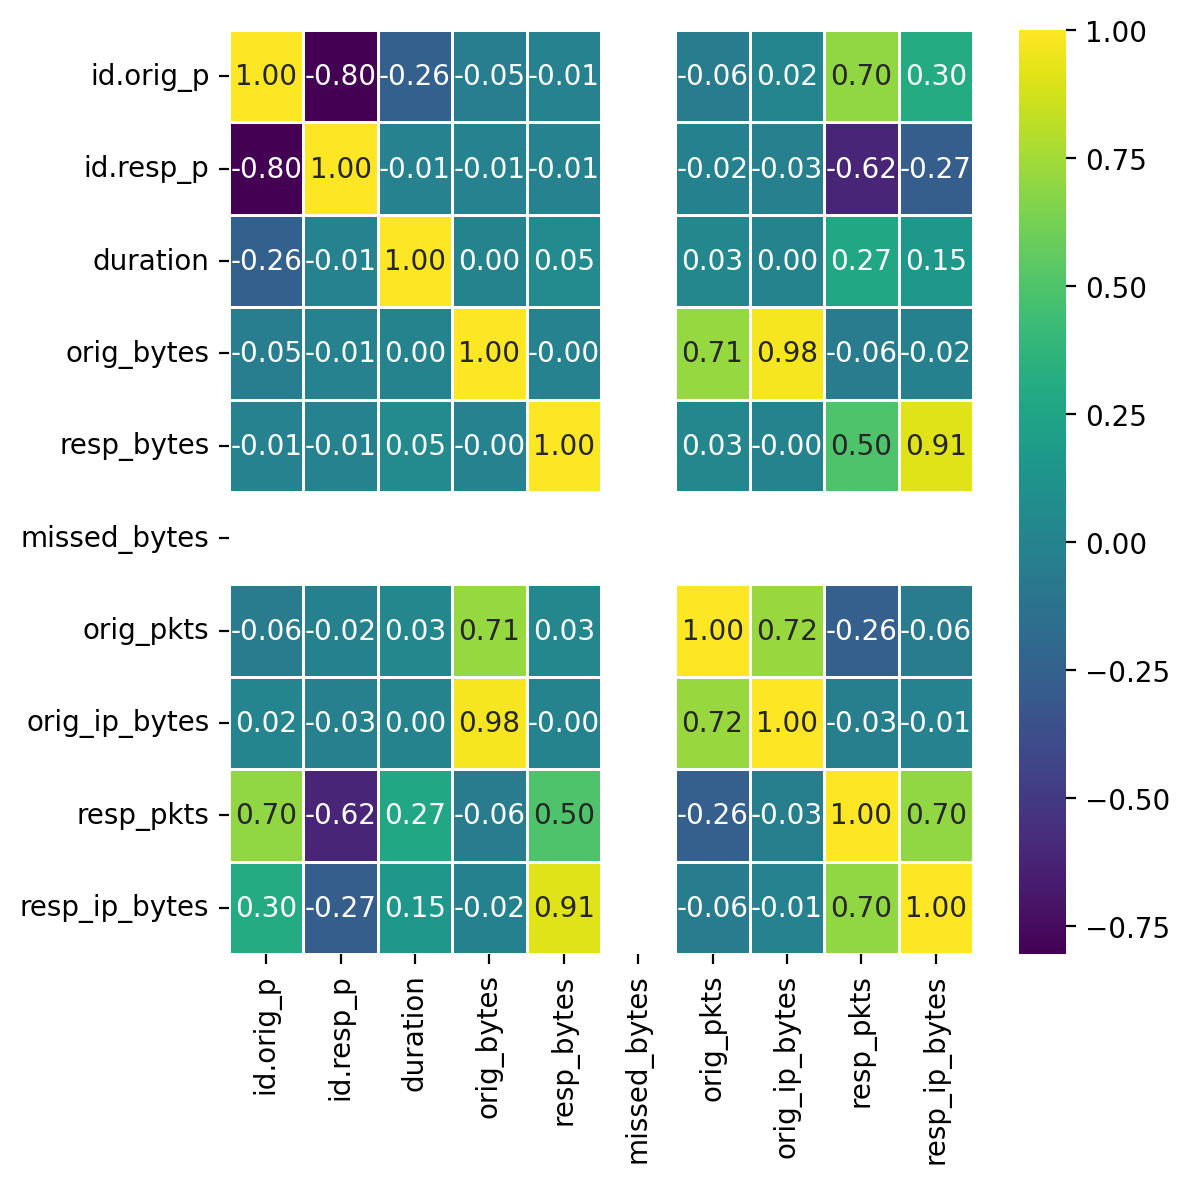

In [797]:
plt.figure(figsize=(6, 6), dpi=200)  #创建一个新的图形（figure）
sns.heatmap(data.drop(obj_cols, axis=1).corr(),
            linewidths=.5,
            linecolor="white",
            cmap="viridis",
            annot=True,
            fmt=".2f")
#这是 Seaborn 库中的一个函数，用于绘制热力图。热力图通常用于表示矩阵形式的数据，其中数值的大小通过不同的颜色强度进行表示。
print("Missing Values: service - 21298, duration - 17824, orig_bytes - 17824, resp_bytes - 17824")

In [798]:
data[["resp_ip_bytes", "resp_bytes"]][data["resp_ip_bytes"]==0]
#首先选取了 resp_ip_bytes 和 resp_bytes 列，然后使用条件表达式 data["resp_ip_bytes"] == 0 来筛选出 resp_ip_bytes 值为 0 的行。

,resp_ip_bytes,resp_bytes
,,
2.0,0,0.0
3.0,0,0.0
4.0,0,NaN
5.0,0,0.0
6.0,0,0.0
...,...,...
13205.0,0,0.0
13206.0,0,0.0
13207.0,0,0.0


In [799]:
for i in data[data["resp_ip_bytes"]==0].index:
    data["resp_bytes"].loc[i] = 0
# 将 data DataFrame 中 resp_ip_bytes 列值为 0 的行对应的 resp_bytes 列的值设置为 0

In [800]:
data["resp_bytes"].isnull().sum()
#没有为nan了

np.int64(257)

In [801]:
data["label"].value_counts()

label
Malicious    12147
Benign        1064
Name: count, dtype: int64

In [802]:
data["label"] = [0 if i=="Malicious" else 1 for i in data["label"]]
# label 列中的值进行替换：如果 label 列的值为 "Malicious"，则替换为 0，如果值为其他内容（通常是 "Benign"），则替换为 1

In [803]:
data["label"].value_counts()

label
0    12147
1     1064
Name: count, dtype: int64

In [804]:
data["service"].isnull().sum()

np.int64(12281)

In [805]:
data["service"].value_counts()

service
http       887
ntp         42
krb_tcp      1
Name: count, dtype: int64

In [806]:
data["service"] = data["service"].replace({"ntp":0, "dns":1, "gssapi":2, "dns":3,"http":4,"krb_tcp":5})
data["service"] = data["service"].fillna(6)
data["service"].isnull().sum()

np.int64(0)

In [807]:
data.drop(["duration", "orig_bytes"], axis=1, inplace=True)
#删除 data DataFrame 中的两列：duration 和 orig_bytes

In [808]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13211 entries, 0.0 to 13210.0
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_h      13211 non-null  object 
 1   id.orig_p      13211 non-null  int64  
 2   id.resp_h      13211 non-null  object 
 3   id.resp_p      13211 non-null  int64  
 4   proto          13211 non-null  object 
 5   service        13211 non-null  float64
 6   resp_bytes     12954 non-null  float64
 7   conn_state     13211 non-null  object 
 8   missed_bytes   13211 non-null  int64  
 9   history        13186 non-null  object 
 10  orig_pkts      13211 non-null  int64  
 11  orig_ip_bytes  13211 non-null  int64  
 12  resp_pkts      13211 non-null  int64  
 13  resp_ip_bytes  13211 non-null  int64  
 14  label          13211 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 2.1+ MB


In [809]:
data["id.orig_h"].value_counts()

id.orig_h
192.168.84.22                            13146
2409:896d:23e:298c:f827:8e4:f0ed:a859       42
fe80::bb5f:5884:edfb:d995                   12
2409:896d:23e:298c::a9                       7
fe80::8c1c:7cff:fe9c:ec3f                    4
Name: count, dtype: int64

In [810]:
data[data["id.orig_h"]=="192.168.226.11"]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
,,,,,,,,,,,,,,,


In [811]:
#data.drop(41, axis=0, inplace=True)

In [812]:
data["proto"].value_counts()

proto
tcp     13144
udp        42
icmp       25
Name: count, dtype: int64

In [813]:

data["proto"] = data["proto"].replace({"tcp":0, "udp":1, "icmp":2})
#根据 proto 列的值对其进行替换，将 udp 替换为 0，其他的协议（通常是 tcp）替换为 1。

In [814]:

#history 列的每个唯一值（例如类别值或字符串）替换为一个 数值标签，这些标签是通过 history 列中唯一值的 枚举（enumeration） 

history_mapping = {v: k for k, v in enumerate(data["history"].unique().tolist())}

# 打印映射关系
print("history mapping:", history_mapping)

# 应用映射
data["history"] = data["history"].replace(history_mapping)
data["history"].value_counts()

history mapping: {'Cd': 0, 'ScADFa': 1, 'ScADF': 2, nan: 3, 'Cr': 4, 'C': 5, 'Sr': 6, 'Hc': 7, 'SchCAR': 8, 'ScACDcCF': 9, 'ScADCcCF': 10, '^hC': 11, 'ScACF': 12, 'ScACDcCcF': 13, 'S': 14, '^hCadcCfA': 15, '^r': 16, 'ScADCcCcF': 17, 'A': 18, 'R': 19, 'ScACDcCcCF': 20, 'SchCADfaF': 21, 'SchCADadfF': 22, 'SchCADaFdfR': 23, 'SchCADaFdR': 24, 'SchCADaFdRf': 25, 'HrCr': 26, 'HrC': 27, 'RR': 28}


history
4     5917
19    5787
2      880
16     241
5      140
6       66
0       42
3       25
11      18
23      15
22      14
7       12
9       11
26       7
12       6
8        6
18       4
14       4
27       3
25       2
1        2
28       2
10       1
13       1
15       1
20       1
17       1
24       1
21       1
Name: count, dtype: int64

In [815]:
data.drop("id.orig_h", axis=1, inplace=True)
# 删除 data DataFrame 中的 id.orig_h 列，并且直接修改原始的 data，不返回新的 DataFrame

In [816]:
# 生成映射字典
conn_state_mapping = {v: k for k, v in enumerate(data["conn_state"].unique().tolist())}

# 打印映射关系
print("conn_state mapping:", conn_state_mapping)

# 应用映射
data["conn_state"] = data["conn_state"].replace(conn_state_mapping)
data["conn_state"].value_counts()

conn_state mapping: {'SHR': 0, 'SH': 1, 'OTH': 2, 'RSTRH': 3, 'REJ': 4, 'RSTO': 5, 'S0': 6, 'SF': 7}


conn_state
3    6158
2    5988
1     903
4      76
0      43
7      32
5       7
6       4
Name: count, dtype: int64

<Axes: >

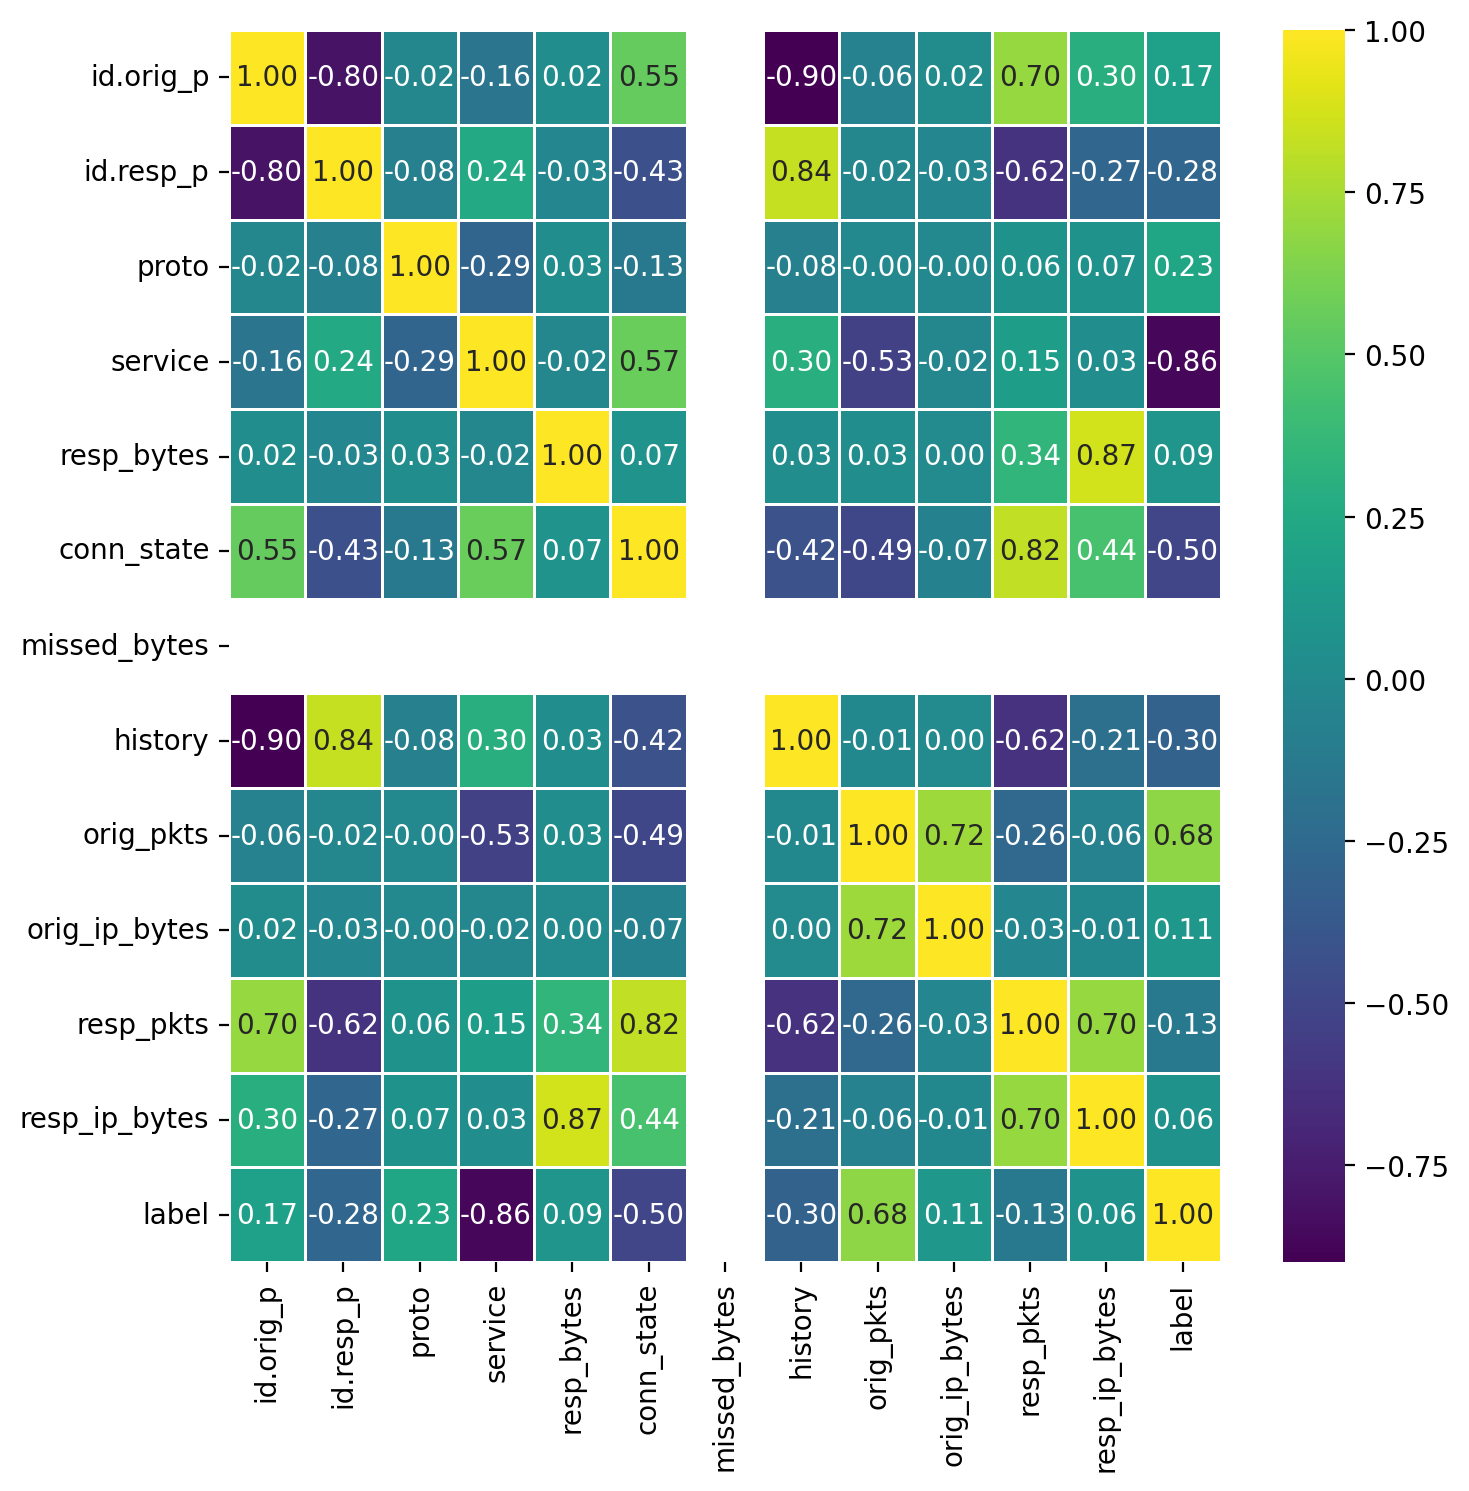

In [817]:
## Checking corr after feature engineering

plt.figure(figsize=(8, 8), dpi=200)
sns.heatmap(data.drop("id.resp_h", axis=1).corr(),
            linewidths=.5,
            linecolor="white",
            cmap="viridis",
            annot=True,
            fmt=".2f")
#绘制热图，用于 查看数据的相关性（correlation）。具体来说，它会生成一个热图，展示 data DataFrame 中每个数值型列之间的相关性，
#并删除 id.resp_h 这一列来避免其对相关性的影响

In [818]:
data["service"].isnull().sum()

np.int64(0)

In [819]:
data["service"].value_counts()

service
6.0    12281
4.0      887
0.0       42
5.0        1
Name: count, dtype: int64

In [820]:
# service_data.dropna(inplace=True, axis=0)
# #dropna() 删除 包含缺失值的行。

In [821]:
data.isnull().sum()

id.orig_p          0
id.resp_h          0
id.resp_p          0
proto              0
service            0
resp_bytes       257
conn_state         0
missed_bytes       0
history            0
orig_pkts          0
orig_ip_bytes      0
resp_pkts          0
resp_ip_bytes      0
label              0
dtype: int64

In [822]:
len(data)

13211

In [823]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [824]:
X = data.drop(["id.resp_h","label","resp_bytes","missed_bytes"], axis=1)
X.info()
#删除 service 和 id.resp_h 列后的所有列。删除这些列是因为它们不被用作特征
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

n_estimators = [64, 100, 128, 200]

max_features = [2, 3, 4]

bootstrap = [True, False]

oob_score = [True, False]

param_grid = {"n_estimators": n_estimators,
              "max_features": max_features,
              "bootstrap": bootstrap,
              "oob_score": oob_score}

rfc_model = RandomForestClassifier()
grid_model = GridSearchCV(rfc_model, param_grid)
grid_model.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 13211 entries, 0.0 to 13210.0
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_p      13211 non-null  int64  
 1   id.resp_p      13211 non-null  int64  
 2   proto          13211 non-null  int64  
 3   service        13211 non-null  float64
 4   conn_state     13211 non-null  int64  
 5   history        13211 non-null  int64  
 6   orig_pkts      13211 non-null  int64  
 7   orig_ip_bytes  13211 non-null  int64  
 8   resp_pkts      13211 non-null  int64  
 9   resp_ip_bytes  13211 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.6 MB


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [64, 100, ...], 'oob_score': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,128


Text(0.5, 0, 'Label')

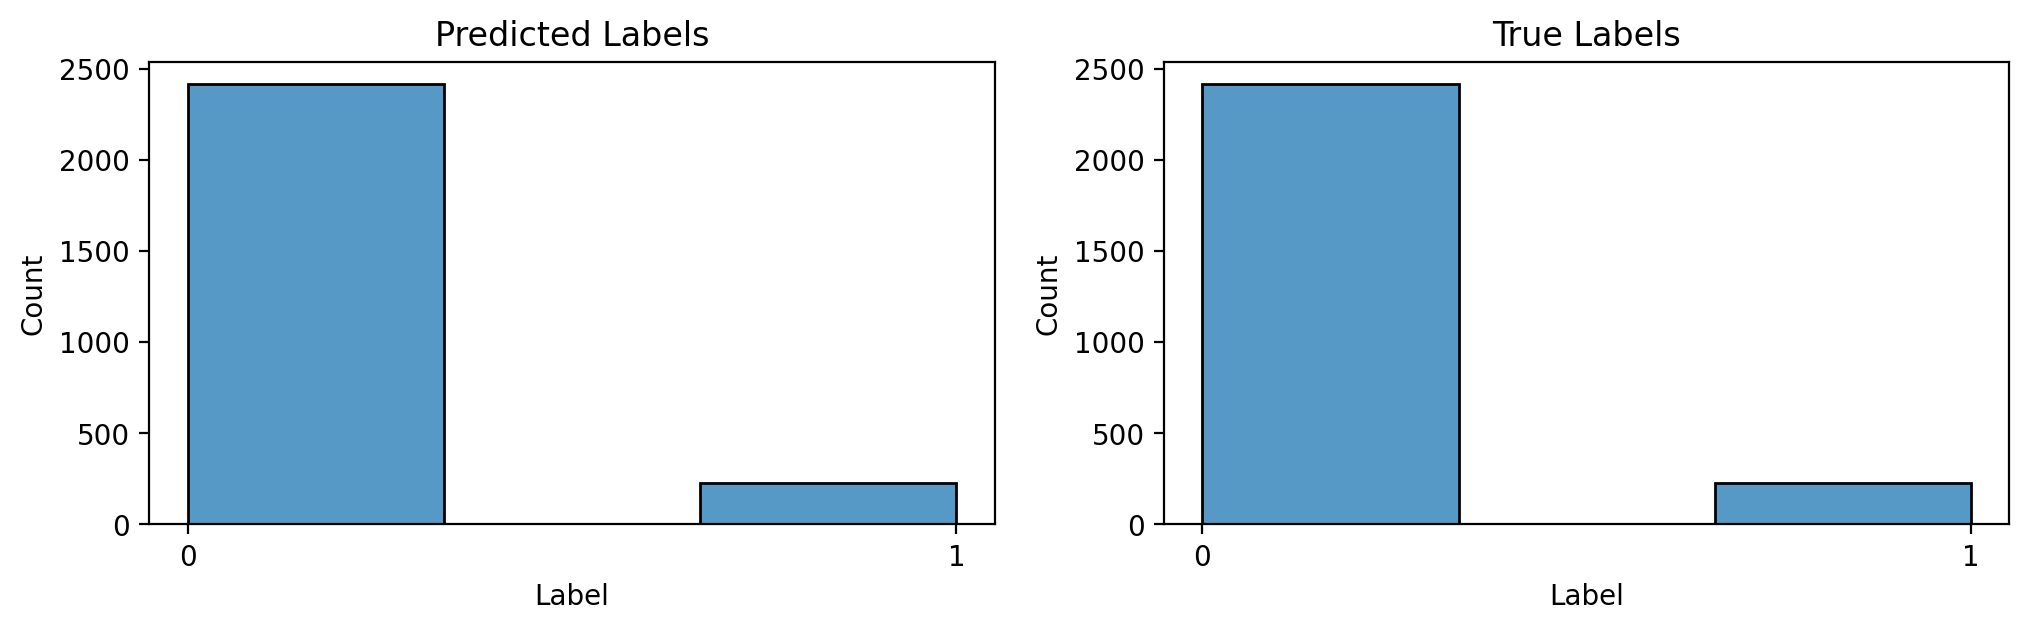

In [825]:
y_preds = grid_model.predict(X_test)


fig = plt.figure(figsize=(12, 3), dpi=200)
ax = fig.add_axes(121)
ax2 = fig.add_axes(122)

sns.histplot(y_preds, bins=3, kde=False, ax=ax)
sns.histplot(y_test, kde=False, bins=3, ax=ax2)

ax.set_title("Predicted Labels")
ax.set_xticks([0, 1])
ax.set_xlabel("Label")

ax2.set_title("True Labels")
ax2.set_xticks([0, 1])
ax2.set_xlabel("Label")

In [826]:
sum(y_preds == y_test), len(y_preds)

(2642, 2643)

In [827]:
import joblib

# 保存模型到文件
joblib.dump(grid_model, 'random_forest_model.pkl')

['random_forest_model.pkl']